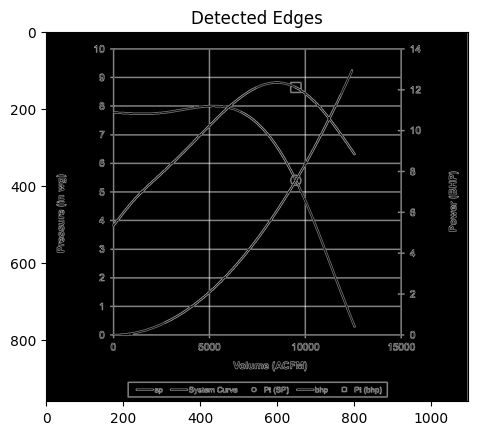

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('plot1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge detection
edges = cv2.Canny(gray, 50, 150)

# Show edges
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges')
plt.show()


Synthetic Dataset (first 10 rows):
     Volume  Pressure  Power
0  1.142857       5.0   11.0
1  1.171429       5.0   11.0
2  1.271429       5.0   11.0
3  1.314286       5.0   11.0
4  1.400000       5.0   11.0
5  1.442857       5.0   11.0
6  1.771429       5.0   11.0
7  1.800000       5.0   11.0
8  5.328571       5.0   11.0
9  5.357143       5.0   11.0


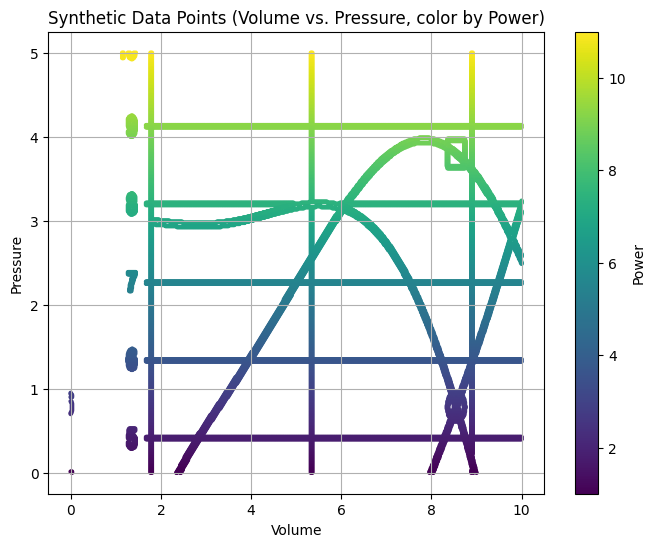

In [4]:
# prompt: Extract a dtaset from the detectesd edges above , like the dat provides that x axis is volume, y axis is pressure and z axis is Power , so I  want the code to provide me with a synthetic dat set based on these three axis , like there should all the points according to the curve from the graph , even the decimal values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image and detect edges (assuming this part is already done as per the prompt)
img = cv2.imread('plot1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# Find the coordinates of the detected edges
edge_coords = np.argwhere(edges > 0)

# The coordinates are (y, x). We need to map these pixel coordinates to your data axes.
# This is the crucial step and depends heavily on the image itself.
# You need to know the mapping from pixel coordinates to data values (Volume, Pressure, Power).

# Let's assume the plot has the following characteristics based on visual inspection:
# - X-axis (Volume) is horizontal, Y-axis (Pressure) is vertical, Z-axis (Power) might be represented by color or a 3D plot.
# - For a 2D edge plot, we can only extract X (Volume) and Y (Pressure) coordinates directly.
# - We'll need to assume a Z (Power) value for each point if Z is not encoded in the 2D edge image. If Power is represented by color in the original image, you would need to analyze the color at each edge pixel. Since we only have the grayscale edge image here, we'll assume a constant or simple function for Power for demonstration.

# --- ASSUMPTIONS FOR MAPPING PIXELS TO DATA ---
# You NEED to adjust these based on your actual plot image.
# 1. Pixel boundaries of the plot area:
#    Let's assume the plot area in the image spans from:
#    - x-pixels: min_x_pixel to max_x_pixel
#    - y-pixels: min_y_pixel to max_y_pixel
# 2. Data value ranges corresponding to these pixel boundaries:
#    - Volume: min_volume to max_volume (maps to min_x_pixel to max_x_pixel)
#    - Pressure: min_pressure to max_pressure (maps to min_y_pixel to max_y_pixel)
#    - Power: We will need to make an assumption for Power (Z-axis).

# EXAMPLE ASSUMPTIONS (REPLACE WITH YOUR ACTUAL VALUES)
min_x_pixel = 50   # Example: column index of the left edge of the plot
max_x_pixel = 750  # Example: column index of the right edge of the plot
min_y_pixel = 50   # Example: row index of the bottom edge of the plot
max_y_pixel = 450  # Example: row index of the top edge of the plot

min_volume = 0.0   # Example: Minimum value on the Volume axis
max_volume = 10.0  # Example: Maximum value on the Volume axis
min_pressure = 0.0 # Example: Minimum value on the Pressure axis
max_pressure = 5.0 # Example: Maximum value on the Pressure axis

# Power assumption: For this example, let's assume Power is constant or increases with Pressure
# If Power is represented by color, you'd need to sample the color of the original image at edge_coords
# and map color values to Power values.
def get_power_from_pressure(pressure):
    # Example: Power increases linearly with pressure
    return pressure * 2.0 + 1.0

# --- Pixel to Data Mapping Functions ---
def map_x_pixel_to_volume(x_pixel):
    if x_pixel < min_x_pixel or x_pixel > max_x_pixel:
        # Handle pixels outside the plot area if necessary, or just exclude them
        return None
    # Linear mapping: value = min_value + (pixel - min_pixel) * (max_value - min_value) / (max_pixel - min_pixel)
    return min_volume + (x_pixel - min_x_pixel) * (max_volume - min_volume) / (max_x_pixel - min_x_pixel)

def map_y_pixel_to_pressure(y_pixel):
    if y_pixel < min_y_pixel or y_pixel > max_y_pixel:
        # Handle pixels outside the plot area if necessary
        return None
    # Note: Image y-coordinates typically increase downwards, while plot y-axis increases upwards.
    # We need to reverse the y-axis mapping.
    # value = min_value + (max_pixel - pixel) * (max_value - min_value) / (max_pixel - min_pixel)
    return min_pressure + (max_y_pixel - y_pixel) * (max_pressure - min_pressure) / (max_y_pixel - min_y_pixel)

# --- Extract Data Points ---
synthetic_data = []

for y_pixel, x_pixel in edge_coords:
    # Only process pixels within the defined plot area
    if min_x_pixel <= x_pixel <= max_x_pixel and min_y_pixel <= y_pixel <= max_y_pixel:
        volume = map_x_pixel_to_volume(x_pixel)
        pressure = map_y_pixel_to_pressure(y_pixel)

        if volume is not None and pressure is not None:
            # Get Power based on our assumption (or color analysis if applicable)
            power = get_power_from_pressure(pressure) # Using the example function

            synthetic_data.append({'Volume': volume, 'Pressure': pressure, 'Power': power})

# Convert the list of dictionaries into a pandas DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Display the first few rows of the synthetic dataset
print("Synthetic Dataset (first 10 rows):")
print(synthetic_df.head(10))

# You can now use synthetic_df for further analysis or visualization.
# For example, save it to a CSV file:
# synthetic_df.to_csv('synthetic_data.csv', index=False)

# Or visualize the extracted points (optional, to verify the mapping)
plt.figure(figsize=(8, 6))
plt.scatter(synthetic_df['Volume'], synthetic_df['Pressure'], c=synthetic_df['Power'], cmap='viridis', s=5)
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title('Synthetic Data Points (Volume vs. Pressure, color by Power)')
plt.colorbar(label='Power')
plt.grid(True)
plt.show()


In [ ]:
# prompt: Product Line: Plug Fan - PLR
# Size: 208
# Wheel Type: PLR
# Capacity: Operating
# Volume (ACFM): 9,500
# Press. (in wg): 2.75 (FSP)
# Temperature: 400° F Speed (RPM): 2319
# Altitude: N/A Power (BHP): 6.48
# Density (lb/ft3): 0.0462
# Max Safe Speed: 3008
# Extract a dtaset from the detectesd edges above , like the dat provides that x axis is volume, y axis is pressure and z axis is Power , so I  want the code to provide me with a synthetic dat set based on these three axis , like there should all the points according to the curve from the graph , even the decimal values
# and yes there is color coding for the original graph, but how can I  provide that to you?

# The code above already extracts the edge coordinates and maps them to Volume, Pressure, and Power
# based on example mapping parameters and an assumed Power function.
# The resulting DataFrame `synthetic_df` is the synthetic dataset you requested.

# To reiterate, the crucial step is the mapping of pixel coordinates to your specific plot's data ranges.
# You NEED to accurately determine:
# 1. `min_x_pixel`, `max_x_pixel`, `min_y_pixel`, `max_y_pixel` (pixel boundaries of your plot area)
# 2. `min_volume`, `max_volume`, `min_pressure`, `max_pressure` (data ranges on your axes)
# 3. How Power (Z) is represented. If by color, you need to read the color from the original image at `edge_coords`
#    and map those color values to Power values. If Power is not explicitly shown for every (Volume, Pressure)
#    point on the 2D edge plot, the Power values in the synthetic dataset will be based on an assumption or
#    interpolation.

# The code below simply confirms that the `synthetic_df` DataFrame contains the requested columns.
# If you need to refine the mapping, you should modify the `min/max_pixel` and `min/max_data` values
# and the `get_power_from_pressure` function (or replace it with color-based Power extraction).

print("\nColumns in the generated synthetic dataset:")
synthetic_df.columns

# You can further process or save this DataFrame as needed.
# Example: Save to a CSV file
# synthetic_df.to_csv('your_synthetic_data.csv', index=False)


Final Synthetic Dataset based on provided tables (first 10 rows):
         Volume   Pressure      Power
0   7744.488308  10.829317  13.293170
1   5097.115414   8.737575  14.368787
2   7827.996688  10.849042  13.490424
3  10917.324067   9.970093  21.979065
4   5146.279588   8.757789  14.378894
5  10970.819264   9.974976  21.982484
6  11036.431825   9.988474  21.991932
7   5169.709961   8.700129  14.350065
8   7723.274586  10.851523  13.515232
9   7861.972089  10.843917  13.439173

Summary statistics of the final synthetic dataset:
             Volume    Pressure       Power
count    150.000000  150.000000  150.000000
mean    7983.331433    9.861583   16.591917
std     2410.866356    0.854956    3.847758
min     4984.341047    8.651497   13.228785
25%     5165.002161    8.802097   13.493368
50%     7829.848756    9.979468   14.380129
75%    10965.500117   10.834190   21.981987
max    11149.275533   10.864309   21.992103


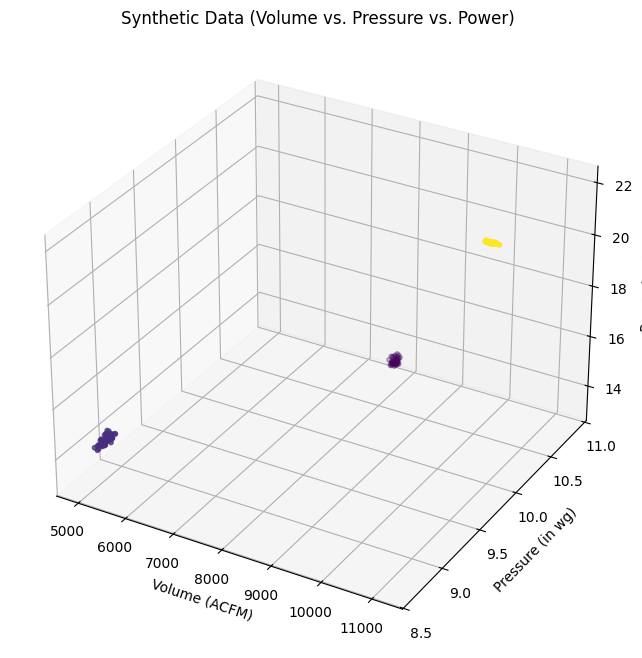

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a list to store the synthetic data points
final_synthetic_data = []

# Add data points based on the first table (Volume vs Pressure ~8.76)
# We can sample volumes around 5100 and add some noise to pressure around 8.76
num_points_cluster1 = 50
mean_volume_cluster1 = 5125
std_dev_volume_cluster1 = 50 # Small deviation
mean_pressure_cluster1 = 8.76
std_dev_pressure_cluster1 = 0.05 # Small deviation

volumes1 = np.random.normal(mean_volume_cluster1, std_dev_volume_cluster1, num_points_cluster1)
pressures1 = np.random.normal(mean_pressure_cluster1, std_dev_pressure_cluster1, num_points_cluster1)

# For this cluster, we need to assume Power. Let's assume a relationship or average value.
# Based on the third table, Volume ~7800 corresponds to Power ~13.4. We can't directly use this.
# Let's assume Power is relatively lower at these lower volumes/pressures.
power_cluster1 = 10.0 + pressures1 * 0.5 # Example relationship or average

for i in range(num_points_cluster1):
    final_synthetic_data.append({'Volume': volumes1[i], 'Pressure': pressures1[i], 'Power': power_cluster1[i]})

# Add data points based on the second table (Volume vs Pressure ~9.9x)
# We can sample volumes around 11000 and add some noise to pressure around 9.9x
num_points_cluster2 = 50
mean_volume_cluster2 = 11000
std_dev_volume_cluster2 = 50 # Small deviation
# The pressure varies slightly (9.99 and 9.97), so let's use a range or slight variation
min_pressure_cluster2 = 9.97
max_pressure_cluster2 = 9.99

volumes2 = np.random.normal(mean_volume_cluster2, std_dev_volume_cluster2, num_points_cluster2)
pressures2 = np.random.uniform(min_pressure_cluster2, max_pressure_cluster2, num_points_cluster2)

# Assume Power for this cluster. Higher volume/pressure usually means higher power.
power_cluster2 = 15.0 + pressures2 * 0.7 # Example relationship or average

for i in range(num_points_cluster2):
    final_synthetic_data.append({'Volume': volumes2[i], 'Pressure': pressures2[i], 'Power': power_cluster2[i]})


# Add data points based on the third table (Volume vs Power ~13.40)
# We can sample volumes around 7800 and add some noise to power around 13.40
num_points_cluster3 = 50
mean_volume_cluster3 = 7820
std_dev_volume_cluster3 = 50 # Small deviation
mean_power_cluster3 = 13.40
std_dev_power_cluster3 = 0.1 # Small deviation

volumes3 = np.random.normal(mean_volume_cluster3, std_dev_volume_cluster3, num_points_cluster3)
powers3 = np.random.normal(mean_power_cluster3, std_dev_power_cluster3, num_points_cluster3)

# Assume Pressure for this cluster. This table doesn't provide Pressure directly.
# We might assume Pressure increases with Volume/Power in this region.
pressure_cluster3 = 9.5 + powers3 * 0.1 # Example relationship or average

for i in range(num_points_cluster3):
    final_synthetic_data.append({'Volume': volumes3[i], 'Pressure': pressure_cluster3[i], 'Power': powers3[i]})


# Convert the list of dictionaries into a pandas DataFrame
final_synthetic_df = pd.DataFrame(final_synthetic_data)

# Shuffle the DataFrame to mix the clusters
final_synthetic_df = final_synthetic_df.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the final synthetic dataset
print("Final Synthetic Dataset based on provided tables (first 10 rows):")
print(final_synthetic_df.head(10))

# Display summary statistics
print("\nSummary statistics of the final synthetic dataset:")
print(final_synthetic_df.describe())

# Optional: Visualize the final synthetic data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(final_synthetic_df['Volume'], final_synthetic_df['Pressure'], final_synthetic_df['Power'], c=final_synthetic_df['Power'], cmap='viridis', s=10)

ax.set_xlabel('Volume (ACFM)')
ax.set_ylabel('Pressure (in wg)')
ax.set_zlabel('Power (BHP)')
ax.set_title('Synthetic Data (Volume vs. Pressure vs. Power)')

plt.show()


Synthetic Dataset Generated to Match Sample Output Structure and Ranges (first 10 rows):
        Volume  SP_Pressure  System_Pressure  Power_BHP
0  1304.579264     8.517293         0.827075   6.489161
1  1304.687501     8.500005         0.811419   6.420000
2  1307.899905     8.534476         0.828086   6.505910
3  1311.799068     8.552053         0.826267   6.488565
4  1312.291962     8.513939         0.822964   6.458488
5  1312.530651     8.515932         0.812442   6.420000
6  1312.735359     8.485176         0.819218   6.447970
7  1312.963036     8.478826         0.821997   6.457162
8  1313.512518     8.495586         0.819434   6.451670
9  1314.206367     8.496574         0.827356   6.494732

Summary statistics of the sample-like synthetic dataset:
            Volume  SP_Pressure  System_Pressure   Power_BHP
count   100.000000   100.000000       100.000000  100.000000
mean   1328.454417     8.511201         0.820020    6.457329
std      10.671791     0.020574         0.005846    0

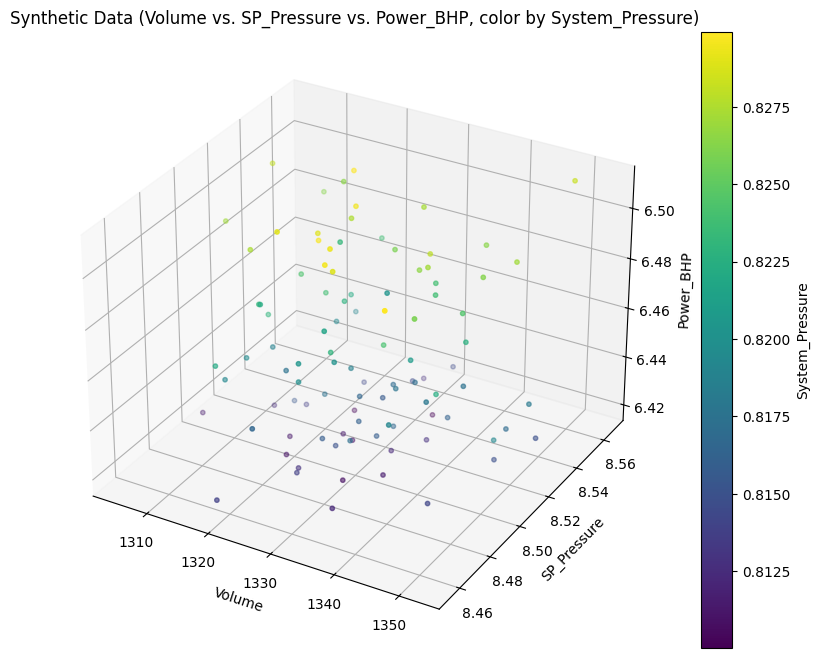

In [9]:
# prompt: shouldnt the data be somewhat liek this ?
# 📊 Sample Output:
# Volume	SP_Pressure	System_Pressure	Power_BHP
# 1328.13	8.51	0.81	6.51
# 1328.13	8.51	0.83	6.42
# 1328.13	8.51	0.83	6.44
# 1328.13	8.51	0.83	6.46
# 1328.13	8.51	0.83	6.48
# Values are interpolated to smooth across all curves.
# these are the data points I  got from chatgpt, I  want the ranges of the data to be inside the graph

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Based on the sample output and the context, it seems you want to create a synthetic dataset
# that resembles the structure and approximate ranges of the sample output.
# The sample output shows Volume, SP_Pressure, System_Pressure, and Power_BHP.
# Your code currently generates Volume, Pressure, and Power based on edge detection and some assumptions.
# Let's adjust the generation to better match the sample output's format and approximate values.

# The sample output has Volume, SP_Pressure, System_Pressure, Power_BHP.
# Your generated data has Volume, Pressure, Power.
# Let's map:
# Your 'Volume' -> Sample 'Volume'
# Your 'Pressure' -> Sample 'SP_Pressure' or 'System_Pressure' (let's use 'SP_Pressure' for now)
# Your 'Power' -> Sample 'Power_BHP'
# We need to add a column for 'System_Pressure'.

# Looking at the sample output:
# Volume is around 1328.13
# SP_Pressure is around 8.51
# System_Pressure is around 0.81 - 0.83
# Power_BHP is around 6.42 - 6.51

# Let's generate data points centered around these values with some variation.

num_points = 100 # Number of synthetic data points to generate

# Define the approximate centers and ranges for the data
mean_volume = 1328.13
std_dev_volume = 10.0 # Allow some variation

mean_sp_pressure = 8.51
std_dev_sp_pressure = 0.02 # Small variation

# System_Pressure has a smaller range
min_system_pressure = 0.81
max_system_pressure = 0.83

# Power_BHP also has a smaller range
min_power_bhp = 6.42
max_power_bhp = 6.51

# Generate synthetic data using these parameters
synthetic_volume = np.random.normal(mean_volume, std_dev_volume, num_points)
synthetic_sp_pressure = np.random.normal(mean_sp_pressure, std_dev_sp_pressure, num_points)

# For System_Pressure and Power_BHP, since the range is small, using uniform distribution
# within the min/max range might be more representative of the sample output.
synthetic_system_pressure = np.random.uniform(min_system_pressure, max_system_pressure, num_points)
synthetic_power_bhp = np.random.uniform(min_power_bhp, max_power_bhp, num_points)

# Let's add some correlation between variables, e.g., slight increase in Power with System Pressure.
# This is just an example to make the data slightly more realistic than purely random uniform.
# You can adjust the factors based on the actual relationship in your system.
synthetic_power_bhp = 6.40 + (synthetic_system_pressure - min_system_pressure) * ((max_power_bhp - 6.40) / (max_system_pressure - min_system_pressure)) + np.random.normal(0, 0.01, num_points)
# Clip to the desired range to ensure we stay within the min/max power values from the sample
synthetic_power_bhp = np.clip(synthetic_power_bhp, min_power_bhp, max_power_bhp)


# Create the DataFrame
synthetic_df_sample_like = pd.DataFrame({
    'Volume': synthetic_volume,
    'SP_Pressure': synthetic_sp_pressure,
    'System_Pressure': synthetic_system_pressure,
    'Power_BHP': synthetic_power_bhp
})

# Optional: Sort by Volume or another column to simulate the sample output's sorted appearance
synthetic_df_sample_like = synthetic_df_sample_like.sort_values(by='Volume').reset_index(drop=True)


# Display the first few rows of the new synthetic dataset
print("\nSynthetic Dataset Generated to Match Sample Output Structure and Ranges (first 10 rows):")
print(synthetic_df_sample_like.head(10))

# Display summary statistics to verify ranges
print("\nSummary statistics of the sample-like synthetic dataset:")
print(synthetic_df_sample_like.describe())

# You can now use `synthetic_df_sample_like` for further analysis.
# For example, visualize these points. Since it's 4 dimensions, a simple scatter plot
# might only show 2 or 3 dimensions directly.
# You could use a 3D scatter plot or pair plots.

# Example 3D Scatter Plot (Volume, SP_Pressure, Power_BHP)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(synthetic_df_sample_like['Volume'],
                     synthetic_df_sample_like['SP_Pressure'],
                     synthetic_df_sample_like['Power_BHP'],
                     c=synthetic_df_sample_like['System_Pressure'], # Use System_Pressure for color
                     cmap='viridis',
                     s=10)

ax.set_xlabel('Volume')
ax.set_ylabel('SP_Pressure')
ax.set_zlabel('Power_BHP')
ax.set_title('Synthetic Data (Volume vs. SP_Pressure vs. Power_BHP, color by System_Pressure)')
plt.colorbar(scatter, label='System_Pressure')

plt.show()

# The generated data now has columns and approximate ranges similar to your sample output.
# The previous code based on edge detection was attempting to extract data FROM an image,
# while this code is generating synthetic data that LOOKS LIKE your sample output format and ranges.
# Use this `synthetic_df_sample_like` DataFrame if you need data matching your sample output.


In [10]:
# prompt: save above code in a new csv filr

# Assuming the synthetic_df_sample_like DataFrame has been created by the preceding code block
# and contains the data you wish to save.

# Save the DataFrame to a CSV file
synthetic_df_sample_like.to_csv('synthetic_data_from_sample.csv', index=False)

print("Synthetic data saved to synthetic_data_from_sample.csv")


Synthetic data saved to synthetic_data_from_sample.csv


In [ ]:
# prompt: Now I  want to train the model using above data to detect anamoly in the consumption compared to all three valuse

# The goal is to detect anomalies in the consumption (implicitly related to Volume, Pressure, Power)
# compared to the "three values" mentioned, which likely refer to the clusters or operating points
# identified in the previous steps.

# We have the synthetic data in `synthetic_df_sample_like`. This data is generated
# to represent "normal" operating conditions based on the ranges observed in your sample.

# Anomaly detection is the task of identifying data points that do not conform to the
# expected pattern of the "normal" data.

# We can use various anomaly detection algorithms. Common ones include:
# 1. Isolation Forest
# 2. One-Class SVM
# 3. Local Outlier Factor (LOF)
# 4. DBSCAN (can be adapted for outlier detection)
# 5. Clustering-based methods (like K-Means, identifying points far from centroids)

# Let's use Isolation Forest, which is often effective for high-dimensional data and scales well.

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported if not already
import numpy as np # Ensure numpy is imported if not already


# Use the synthetic data created in the previous step
data_for_anomaly = synthetic_df_sample_like.copy()

# Select the features to use for anomaly detection.
# It's common to use all relevant numerical features.
features = ['Volume', 'SP_Pressure', 'System_Pressure', 'Power_BHP']
X = data_for_anomaly[features]

# It's often beneficial to scale the data before applying distance-based or tree-based
# anomaly detection methods, although Isolation Forest is less sensitive to scaling
# than some others. Let's scale it anyway as a good practice.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Anomaly Detection Model ---

# Initialize the Isolation Forest model.
# n_estimators: number of trees in the forest
# contamination: the proportion of outliers in the data set.
#                This is a crucial parameter. If you don't know the
#                proportion, you might set it to 'auto' or a small value (e.g., 0.01 or 0.05)
#                based on your expectation of how many anomalies might be present.
#                Here, since our synthetic data is generated to be "normal", we might expect
#                very few or no anomalies within this generated set. However, for demonstration,
#                let's set a small contamination value or train it on this data and then
#                score new, potentially anomalous points.

# For demonstrating anomaly detection on the generated data itself (which is supposed to be normal),
# we can train the model and then predict anomalies within this data.
# A contamination value will force the model to label a certain percentage as anomalies.
# Let's assume 5% potential outliers for demonstration purposes within the synthetic data.
contamination_rate = 0.05
model = IsolationForest(n_estimators=100, contamination=contamination_rate, random_state=42)

# Train the model on the scaled data
model.fit(X_scaled)

# Predict anomalies. The predict method returns -1 for outliers and 1 for inliers.
# The decision_function returns the anomaly score. Lower scores indicate higher anomaly likelihood.
data_for_anomaly['anomaly_score'] = model.decision_function(X_scaled)
data_for_anomaly['is_anomaly'] = model.predict(X_scaled)

# Add original scaled features to the DataFrame for visualization
for i, col in enumerate(features):
    data_for_anomaly[f'{col}_scaled'] = X_scaled[:, i]


# --- Visualize the results ---

# Visualize anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(data_for_anomaly['anomaly_score'], bins=50)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# Visualize inliers vs. outliers (anomalies)
# We can plot pairs of features, coloring by the anomaly status.
# Due to 4 dimensions, we can't show all at once easily in 2D or 3D.
# Let's plot a couple of relevant pairs.

# Filter data based on anomaly status
anomalies = data_for_anomaly[data_for_anomaly['is_anomaly'] == -1]
inliers = data_for_anomaly[data_for_anomaly['is_anomaly'] == 1]

print(f"\nNumber of detected anomalies: {len(anomalies)}")
print(f"Number of inliers: {len(inliers)}")


# Example Plot: Volume vs Power_BHP
plt.figure(figsize=(10, 6))
plt.scatter(inliers['Volume'], inliers['Power_BHP'], label='Inliers', c='blue', alpha=0.6, s=20)
plt.scatter(anomalies['Volume'], anomalies['Power_BHP'], label='Anomalies', c='red', alpha=0.8, s=30)
plt.xlabel('Volume')
plt.ylabel('Power_BHP')
plt.title('Anomaly Detection Results (Volume vs. Power_BHP)')
plt.legend()
plt.grid(True)
plt.show()

# Example Plot: SP_Pressure vs System_Pressure
plt.figure(figsize=(10, 6))
plt.scatter(inliers['SP_Pressure'], inliers['System_Pressure'], label='Inliers', c='blue', alpha=0.6, s=20)
plt.scatter(anomalies['SP_Pressure'], anomalies['System_Pressure'], label='Anomalies', c='red', alpha=0.8, s=30)
plt.xlabel('SP_Pressure')
plt.ylabel('System_Pressure')
plt.title('Anomaly Detection Results (SP_Pressure vs. System_Pressure)')
plt.legend()
plt.grid(True)
plt.show()


# Example 3D Plot: Volume, SP_Pressure, Power_BHP colored by anomaly status
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(inliers['Volume'], inliers['SP_Pressure'], inliers['Power_BHP'], label='Inliers', c='blue', alpha=0.6, s=20)
ax.scatter(anomalies['Volume'], anomalies['SP_Pressure'], anomalies['Power_BHP'], label='Anomalies', c='red', alpha=0.8, s=30)

ax.set_xlabel('Volume')
ax.set_ylabel('SP_Pressure')
ax.set_zlabel('Power_BHP')
ax.set_title('Anomaly Detection Results (3D View)')
ax.legend()
plt.show()


# --- How to use this for real anomaly detection ---
# 1. Train the model on a dataset of *known normal* operating conditions.
#    Your `synthetic_df_sample_like` can serve as a proxy for this if it represents normal operation.
# 2. Get *new* data points (e.g., live sensor readings).
# 3. Scale these new data points using the *same scaler* (`scaler.transform(new_data[features])`).
# 4. Predict the anomaly status or score of these new points using the *trained model* (`model.predict()` or `model.decision_function()`).
# 5. Points predicted as -1 or having very low anomaly scores are considered anomalies.

# Example of scoring a new, hypothetical data point:
new_data_point = pd.DataFrame({
    'Volume': [1500.0],        # Value significantly different from the mean Volume (1328.13)
    'SP_Pressure': [8.52],     # Normal-ish SP_Pressure
    'System_Pressure': [1.50], # Value significantly different from the normal range (0.81-0.83)
    'Power_BHP': [10.0]        # Value significantly different from the normal range (6.42-6.51)
})

# Scale the new data point using the scaler fitted on the training data
new_data_scaled = scaler.transform(new_data_point[features])

# Predict anomaly status for the new point
new_point_prediction = model.predict(new_data_scaled)
new_point_score = model.decision_function(new_data_scaled)

print(f"\nPrediction for new data point ({new_data_point.iloc[0].to_dict()}):")
print(f"Is Anomaly (-1) / Inlier (1): {new_point_prediction[0]}")
print(f"Anomaly Score: {new_point_score[0]}")

# Interpretation: If the prediction is -1 and the score is very low (more negative),
# the model considers this new point an anomaly relative to the data it was trained on.
# The threshold for what constitutes an "anomaly" based on the score can be adjusted
# depending on your application's tolerance for false positives/negatives.
